# Deep Learning 2025 - Assignment 2: Age Estimation with Facial Image via Feedforward Neural Networks
Instructed by Ali Salar (ali.salar@oulu.fi)

## Outline
#### In this assignment, you will implement an age estimation model with facial images. Through this, you will:
* Basics of (deep) feedforward neural networks (NNs)
* Building a simple NN from scratch using NumPy to understand how forward/back propagation and optimization work
* Gradient check using finite-difference approximation
* Mini-batch gradient descent with momentum
* Hyperparameter & activation function tuning methods to improve the performance of NNs

#### <span style="color:blue">Tasks & grading (<span style="color:green">10 points</span>)<span>

* **Part 1: Importing libraries, loading and preprocessing the training and testing data**
* **Part 2: Build neural network and implement its forward and backward propagation (<span style="color:green">7.5 points</span>)**
  * 2.1 Check the structure of the dataset
  * 2.2 Construct model and implement forward propagation (<span style="color:green">4 points</span>)
    * Initialize model parameters (<span style="color:green">1 point</span>)
    * Define activation functions (<span style="color:green">2 points</span>)
    * Implement forward propagation (<span style="color:green">1 point</span>)
  * 2.3 Loss function computation and backward propagation (<span style="color:green">3.5 points</span>)
    * Implement mean squared error loss function (<span style="color:green">1 point</span>)
    * Implement backward propagation (<span style="color:green">2.5 points</span>)
    * Extended Reading: Gradient check using finite-difference approximation
* **Part 3: Training and evaluation of your neural network (<span style="color:green">2 points</span>)**
  * 3.1 Training your network (<span style="color:green">1.5 points</span>)
  * 3.2 Evaluating the performance of your model (<span style="color:green">0.5 points</span>)

* **Part 4: Activation function tuning (<span style="color:green">0.5 points</span>)**
  * 4.1 Using different activation functions to check their effectiveness (<span style="color:green">0.5 points</span>)

#### <span style="color:blue">Introduction to Age Estimation and Dataset<span>
* Age estimation with facial image: train a model which takes the facial image as input and predict the age of the human correctly. Below are some examples:
<div style="text-align: center;">
  <figure style="display:inline-block; margin:10px;">
    <img src="attachment:7804c5af-25c0-4f22-90de-605f63e53e82.jpg" width="150"/>
    <figcaption>Age: 14</figcaption>
  </figure>
  <figure style="display:inline-block; margin:10px;">
    <img src="attachment:b2a32aea-3727-4d13-9599-771162f12a01.jpg" width="150"/>
    <figcaption>Age: 25</figcaption>
  </figure>
  <figure style="display:inline-block; margin:10px;">
    <img src="attachment:9dac24de-2228-4597-b08b-9ab0f3834bb2.jpg" width="150"/>
    <figcaption>Age: 35</figcaption>
  </figure>
  <figure style="display:inline-block; margin:10px;">
    <img src="attachment:22016126-136a-4c30-86d6-f93430bbe8c6.jpg" width="150"/>
    <figcaption>Age: 40</figcaption>
  </figure>
</div>

* [**UTKFace**](https://susanqq.github.io/UTKFace/) [1] dataset is a large-scale face dataset with long age span (range from 0 to 116 years old). The dataset consists of over 20,000 face images with annotations of age, gender, and ethnicity. The images cover a large variation in pose, facial expression, illumination, occlusion, resolution, etc. This dataset could be used on a variety of tasks, e.g., face detection, age estimation, age progression/regression, landmark localization, etc. In this assignment, we use 13,938 images, restricting the dataset to subjects aged 10–40 years to accommodate limited computational resources.

[1] Zhang Z, Song Y, Qi H. Age progression/regression by conditional adversarial autoencoder. InProceedings of the IEEE conference on computer vision and pattern recognition 2017.

#### <span style="color:blue">Hints<span>
* To find the place where you have to insert your solution, hit Crtl + F and search for **TODO:**. You are **NOT** supposed to modify the code of other parts.
* **Be careful with the shape** of your tensors (e.g. the weights and gradients) in your implementation. Double-check and make sure that the dimensions match the computations, especially in the case of matrix multiplication.
* You can check the correctness of your code by comparing your intermediate outputs with the provided **<span style="color:green">reference results</span>**. **Please remember to do this in every step in order to avoid cumulating errors in your implementation.**

#### <span style="color:blue">Environment<span>
Python 3, Numpy, matplotlib

## <span style="color:blue">Part 1: Importing libraries, loading and preprocessing the training and test data<span>
**<span style="color:red">You don't need to change any of the code in this part!<span>**

In [1]:
# You will mainly use NumPy to construct your NN
import numpy as np
import matplotlib, time, copy, os, requests, zipfile, sys
# Matplotlib for displaying images
import matplotlib.pyplot as plt

### <span style="color:blue">Downloading the UTKFace dataset from OneDrive<sapn>
Installing first [onedrivedownloader](https://pypi.org/project/onedrivedownloader/) package for downloading the data.

In [2]:
!pip install onedrivedownloader

Downloading the UTKFace dataset.

In [3]:
from onedrivedownloader import download

link = 'https://unioulu-my.sharepoint.com/:u:/g/personal/asalar24_univ_yo_oulu_fi/EcLVUxQDdDhDt__ql-u03x8B1Sp45VhkyCbw68v8aVMqUg?e=rBvgRd'

if not os.path.exists('./data_hw2/UTK_npy'):
    print('Downloading dataset')
    download(link, filename="./UTK_npy.zip", unzip=True, unzip_path='./data_hw2')
else:
    print('The dataset is already downloaded!')

100%|██████████| 13.7M/13.7M [00:01<00:00, 10.2MiB/s]


Unzipping file...


Extracting files: 100%|██████████| 5/5 [00:00<00:00, 20.69it/s]


### <span style="color:blue">Defining functions for preprocessing the training & testing data<span>

In [4]:
def reshape_train_data(X):
    ''' Input training data has shape (11139, 32, 32)
        Input testing data has shape (2799, 32, 32)
        where:
        11139 is the number of input training samples
        2799 is the number of input testing samples
    '''
    samples, H, W = X.shape
    # Reshape input volume to (sample, 1024), which means that the size of your NN input layer will be 1024
    # We scale the grayscale values by dividing them by 255, which will help to improve the training performance
    return X.reshape(samples, H * W).T / 255

### <span style="color:blue">Preprocessing the dataset<span>

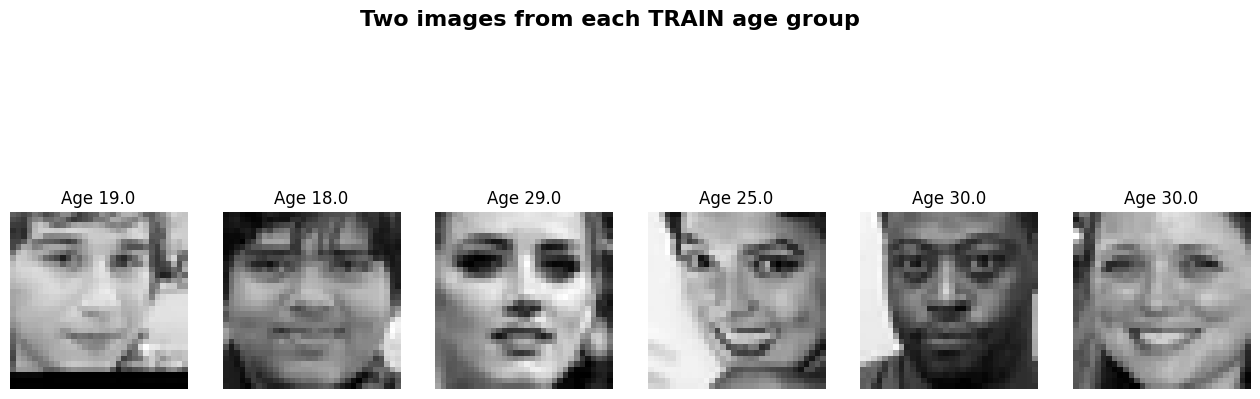

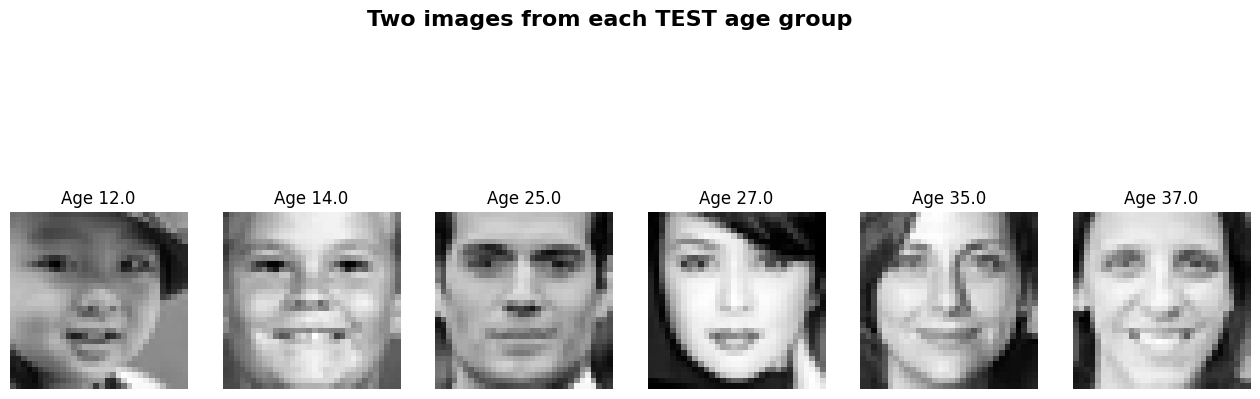

In [5]:
PATH = os.path.join('data_hw2', 'UTK_npy')

# Load the training samples
X_train = np.load(os.path.join(PATH, 'train_images.npy'))
# Load the test samples
X_test = np.load(os.path.join(PATH, 'test_images.npy'))
# Load the training labels
Y_train_r = np.load(os.path.join(PATH, 'train_ages.npy'))
Y_train = (Y_train_r - 10) / (40 - 10) # Normalizing labels between 0 and 1
# Load the test labels
Y_test_r = np.load(os.path.join(PATH, 'test_ages.npy'))
Y_test = (Y_test_r - 10) / (40 - 10) # Normalizing labels between 0 and 1

# Get the number of training images and their resolution
num_trains, HEIGHT, WIDTH = X_train.shape

# Reshape the training and test data
X_train, X_test = reshape_train_data(X_train), reshape_train_data(X_test)

age_groups = [(0, 1/3), (1/3, 2/3), (2/3, 1)]

np.random.seed(1)
def plot_age_group_images(X, Y, Y_norm, title):
    fig, axes = plt.subplots(1, 6, figsize=(16, 6))
    fig.suptitle(title, fontsize=16, fontweight='bold')

    plot_idx = 0
    for (low, high) in age_groups:
        indices = np.where((Y_norm >= low) & (Y_norm < high))[0]
        if len(indices) < 2:
            print(f"Not enough samples for age group {low}-{high}")
            continue
        chosen = np.random.choice(indices, size=2, replace=False)
        for idx in chosen:
            # Reshape depending on how reshape_train_data works
            if X.shape[0] == num_trains:  # (num_trains, HEIGHT*WIDTH)
                img = X[idx].reshape(HEIGHT, WIDTH)
            else:  # (HEIGHT*WIDTH, num_trains)
                img = X[:, idx].reshape(HEIGHT, WIDTH)

            axes[plot_idx].imshow(img, cmap="gray")
            axes[plot_idx].set_title(f"Age {Y[idx]}")
            axes[plot_idx].axis("off")
            plot_idx += 1

    plt.show()

# --- PLOT TRAIN AND TEST ---
np.random.seed(0)
plot_age_group_images(X_train, Y_train_r, Y_train, "Two images from each TRAIN age group")
plot_age_group_images(X_test, Y_test_r, Y_test, "Two images from each TEST age group")

## <span style="color:blue">Part 2: Build neural network and implement its forward and backward propagation (<span style="color:green">5.5 points</span>)<span>
#### <span style="color:blue">The fun part begins here.<span>
*Definition:* loss function is a function that maps an event or values of one or more variables onto a real number intuitively representing some "cost" associated with the event. Loss function (sometimes called cost function) is used to calculate the gradient by applying the chain rule, so that we can update the weights (and bias) of our neural network using an optimizer such as gradient descent. <br>
It could be interpreted as using the loss function to calculate the network’s layers error, in which we calculate the error of the current layer, then pass the weighted error back to the previous layer, and recursively doing this until we travel back to the first hidden layer. At each layer, we update the weights using the derivative of the cost for each weight.

Let illustrate this concept using a simple toy example.



![Figure1.png](http://yty.kapsi.fi/DLcourse/ass2/Figure1.png)

<center> <strong> <font size="3" color="red"> Figure 1. Toy example of backpropagation </font> </strong> </center>

In **Fig. 1** we have a loss function $L$:
\begin{align}
L = c \times d
\end{align}

where <br>

\begin{align}
c = a + b -5
\end{align}

and <br>

\begin{align}
d = b^2 + b -1
\end{align}

As illustrated in **Fig. 1**, the equations in the edge show the partial derivation of some functions with respect to their direct variables. For example, $\frac{\partial L}{\partial c}$ is the partial derivative of $L$ with respect to $c$. <br>
However, we are actually interested in calculating the derivative of $L$ with respect to $a$ and $b$, which don't directly connected with each other. So, how can we do this? As mentioned earlier, we can do this using the chain-rule so that we can calculate $\frac{\partial L}{\partial a}$ and $\frac{\partial L}{\partial b}$ as:

\begin{align}
\frac{\partial L}{\partial a} = \frac{\partial L}{\partial c} \cdot \frac{\partial c}{\partial a}
\end{align}

and <br>

\begin{align}
\frac{\partial L}{\partial b} = \frac{\partial L}{\partial c} \cdot \frac{\partial c}{\partial b} + \frac{\partial L}{\partial d} \cdot \frac{\partial d}{\partial b}
\end{align}

More importantly, **we can see that $a$ affect $L$ through $c$, and so on**. This concept hold no matter how many hidden layers you have or how complicated your loss will be as long as you use backpropagation to calculate the derivative to update your weights.

**Now, let's get your hand dirty.**

### <span style="color:blue">2.1 Check the structure of the dataset.<span>

Before we start, one important thing is to check the structure of the input data. We can run the following code to print the shape of the train and test data.

In [6]:
print('Shape of X_train:', X_train.shape)
print('Shape of Y_train:', Y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of Y_test:', Y_test.shape)

Shape of X_train: (1024, 11139)
Shape of Y_train: (11139,)
Shape of X_test: (1024, 2799)
Shape of Y_test: (2799,)


**<span style="color:green">Reference Results:</span>** <br>
Shape of X_train: (1024, 11139)<br>
Shape of Y_train: (11139,)<br>
Shape of X_test: (1024, 2799)<br>
Shape of Y_test: (2799,)<br>

### <span style="color:blue">2.2 Construct the model and implement its forward propagation (<span style="color:green">5 points</span>)<span>

**Fig. 2** below shows the model that we will be using in this assignment.



![Figure2.png](attachment:e85ab471-a0fc-4b55-bac9-3f9d7b4e27bb.png)
<center> <strong> <font size="4" color="red"> Figure 2. Composition of our simple feed-forward neural network </font> </strong> </center>

# <span style="color:blue">Initialize model parameters (<span style="color:green">1 point</span>)<span>

As shown in the **Fig. 2**, our neural network contains two hidden layers (with **512** and **256** neurons in the first and second hidden layers by default, respectively) and an output layer. To further simplify things, we will not include biases in our model. Be aware that, while the number of neurons in the hidden layer can be arbitrary, there must be 1 neuron in the output layer because it is a regression problem.

In the following, you will have to construct your network based on the **Fig. 2**.

Let's fix first the parameters of our neural network to the default setting.

In [7]:
# Number of input units
num_inputs = X_train.shape[0]

# Number of neurons in the hidden layer
num_hidden_1 = 512
num_hidden_2 = 256

# Number of output units
num_outputs = 1

Now, initialize the network parameters randomly in the code cell below so that the shape of the weights is **(out_dim, in_dim)**, where the **in_dim** and **out_dim** correspond to the input and output dimensions of a layer.

In [8]:
def init_parameters(num_inputs, num_hidden_1, num_hidden_2, num_outputs):
    """Method for initializing the model parameters and the learning velocity of momentum for gradient descent.

    Returns:
        parameters (tuple): the model parameters: W1, W2, W3
        velocity (tuple): the learning velocity of momentum: V_dW1, V_dW2, V_dW3
    """

    # Construct your neural network in Fig. 2
    # TODO: Initialize randomly the hidden_1, hidden_2 and output layer weights (w/o bias) (0.5 points)
    # Hint: use np.random.randn()
    W1 = np.sqrt(2 / num_inputs) * np.random.randn(num_hidden_1, num_inputs)
    W2 = np.sqrt(2 / num_hidden_1) * np.random.randn(num_hidden_2, num_hidden_1)
    W3 = np.sqrt(2 / num_hidden_2) * np.random.randn(num_outputs, num_hidden_2)

    parameters = W1, W2, W3

    # TODO: Initialize the momentum of gradient descent to zero (0.5 points)
    # In gradient descent with momentum,  the momentum tensor has exactly the same shape as the parameters it is tracking
    # because it stores a moving average of
    # the gradients for each parameter.
    # Hint: use np.zeros()
    V_dW1 = np.zeros_like(W1)
    V_dW2 = np.zeros_like(W2)
    V_dW3 = np.zeros_like(W3)

    velocity = V_dW1, V_dW2, V_dW3

    return parameters, velocity

Check whether your output matches the reference results.

In [9]:
parameters, velocity = init_parameters(num_inputs, num_hidden_1, num_hidden_2, num_outputs)

W1, W2, W3 = parameters

print('Shape of W1:', W1.shape)
print('Shape of W2:', W2.shape)
print('Shape of W3:', W3.shape)

Shape of W1: (512, 1024)
Shape of W2: (256, 512)
Shape of W3: (1, 256)


**<span style="color:green">Reference Results:</span>** <br>
Shape of W1: (512, 1024)<br>
Shape of W2: (256, 512)<br>
Shape of W3: (1, 256)<br>

### <span style="color:blue">Define activation functions (<span style="color:green">2 points</span>)<span>

The tanh (hyperbolic tangent) activation is defined as:

$$
{\rm tanh}(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}
\tag{1}
$$

The sigmoid activation is defined as:

$$
{\rm sigmoid}(x) = \frac{1}{1 + e^{-x}}
\tag{2}
$$

The ReLU (Rectified Linear Unit) is defined as:

$$
{\rm ReLU}(x) = \text{max}(x, 0) =
\begin{cases}
x, & \text{if}\ x > 0 \\
0, & \text{otherwise}
\end{cases}
\tag{3}
$$

In [10]:
def tanh(X):
    # TODO: implement Eq. 1 (1 point)
    # Hint: use np.exp()
    return (np.exp(X) - np.exp(-X)) / (np.exp(X) + np.exp(-X))

def sigmoid(X):
    # TODO: implement Eq. 2 (0.5 points)
    return 1 / (1 + np.exp(-X))

def relu(X):
    # TODO: implement Eq. 3 (0.5 points)
    # Hint: use np.maximum()
    return np.maximum(0, X)

Check whether your output matches the reference results.

In [11]:
X = np.array([-1, 0, 2]).reshape(-1, 1)

print('tanh(x)')
print(tanh(X), '\n')

print('sigmoid(x)')
print(sigmoid(X), '\n')

print('relu(x)')
print(relu(X), '\n')

tanh(x)
[[-0.76159416]
 [ 0.        ]
 [ 0.96402758]] 

sigmoid(x)
[[0.26894142]
 [0.5       ]
 [0.88079708]] 

relu(x)
[[0]
 [0]
 [2]] 



**<span style="color:green">Reference Results:</span>** <br>
tanh(x)<br>
[[-0.76159416]<br>
 [ 0.        ]<br>
 [ 0.96402758]]<br>

sigmoid(x)<br>
[[0.26894142]<br>
 [0.5       ]<br>
 [0.88079708]] <br>

relu(x)<br>
[[0]<br>
 [0]<br>
 [2]]<br>

To get a better understanding of the tanh, sigmoid, and ReLU activation functions, we can also visualize them as follows:

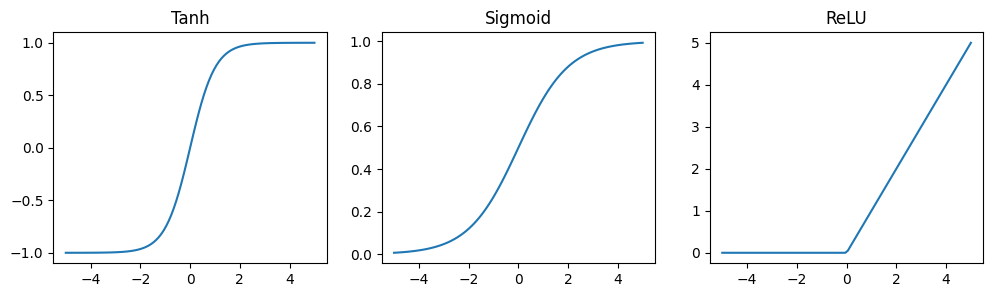

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))

x = np.linspace(-5, 5, 100).reshape(-1, 1)

ax[0].set_title('Tanh')
ax[0].plot(x, tanh(x))

ax[1].set_title('Sigmoid')
ax[1].plot(x, sigmoid(x))

ax[2].set_title('ReLU')
ax[2].plot(x, relu(x))

### <span style="color:blue">Implement forward propagation (<span style="color:green">1 point</span>)<span>

According to the model in **Fig. 2**, our **forward propagation** consists of three parts:

First, we calculate the output activation $A_1$ for the first hidden layer:

$$
\begin{align}
Z_1 &= W_1 X \tag{4} \\
A_1 &= {\rm Act1}(Z_1) \tag{5}
\end{align}
$$

where $W_1$ corresponds to the weights of the first hidden layer and $X$ corresponds to the input.


Then, we calculate the activation $A_2$ for the second hidden layer:

$$
\begin{align}
Z_2 &= W_2 A_1 \tag{6} \\
A_2 &= {\rm Act2}(Z_2) \tag{7}
\end{align}
$$

where $W_2$ corresponds to the weights of the second hidden layer.

Finally, we calculate the activation $A_3$ for the output layer:

$$
\begin{align}
Z_3 &= W_3 A_2 \tag{8} \\
A_3 &= Z_3 \tag{9}
\end{align}
$$

where $W_3$ is the weights of the output layer.

Now, construct the function for forward propagation in the code cell below.

In [13]:
def get_activation_func(a1='relu', a2='relu'):
    if a1 == 'sigmoid':
        AF1 = sigmoid
    elif a1 == 'tanh':
        AF1 = tanh
    elif a1 == 'relu':
        AF1 = relu
    #
    if a2 == 'sigmoid':
        AF2 = sigmoid
    elif a2 == 'tanh':
        AF2 = tanh
    elif a2 == 'relu':
        AF2 = relu
    return AF1, AF2


def forward_propagation(X, parameters, a1, a2):
    """Method for forward propagation.
    Args:
        X (np.array): Input data
        parameters (tuple): model parameters: W1, W2, W3

    Returns:
        outputs (tuple): cached outputs of forward propagation: Z1, A1, Z2, A2, Z3 (used later in backpropagation)
    """

    W1, W2, W3 = parameters

    AF1, AF2 = get_activation_func(a1, a2)

    # TODO: implement the forward propagation presented in Fig. 2 based on Eq. 4 - 9 (1 point)
    # Hint: use np.matmul() to implement matrix multiplication
    Z1 = np.matmul(W1, X)
    A1 = AF1(Z1)
    Z2 = np.matmul(W2, A1)
    A2 = AF2(Z2)
    Z3 = np.matmul(W3, A2)
    A3 = Z3

    outputs = Z1, A1, Z2, A2, Z3, A3
    return outputs

Check whether your output matches the reference results.

In [14]:
np.random.seed(1)
X = np.random.randn(num_inputs, 2)

parameters, _ = init_parameters(num_inputs, num_hidden_1, num_hidden_2, num_outputs)
Z1, A1, Z2, A2, Z3, A3 = forward_propagation(X, parameters, 'relu', 'relu')

print('Shape of X:', X.shape)
print('Shape of Z1:', Z1.shape)
print('Shape of A1:', A1.shape)
print('Shape of Z2:', Z2.shape)
print('Shape of A2:', A2.shape)
print('Shape of Z3:', Z3.shape)
print('Shape of A3:', A3.shape)

print('\nExample results of A3:')
print(A3)

Shape of X: (1024, 2)
Shape of Z1: (512, 2)
Shape of A1: (512, 2)
Shape of Z2: (256, 2)
Shape of A2: (256, 2)
Shape of Z3: (1, 2)
Shape of A3: (1, 2)

Example results of A3:
[[ 1.18853144 -1.03533236]]


**<span style="color:green">Reference Results:</span>** <br>
Shape of X: (1024, 2)<br>
Shape of Z1: (512, 2)<br>
Shape of A1: (512, 2)<br>
Shape of Z2: (256, 2)<br>
Shape of A2: (256, 2)<br>
Shape of Z3: (1, 2)<br>
Shape of A3: (1, 2)<br>

Example results of A3:<br>
[[1.18853144 -1.03533236]]<br>

### <span style="color:blue">2.3 Loss function computation and backward propagation (<span style="color:green">3.5 points</span>)<span>

### <span style="color:blue">Implement the mean squared error loss function (<span style="color:green">1 point</span>)<span>

The mean squared error loss function is defined:

$$
L = {\rm MSELoss}(Y, A_3) = \frac{1}{M} \sum_{k=0}^{M} (Y_k - {A_3}_k)^{2} \tag{10}
$$

where $Y$ corresponds to the ground truth labels, $A_3$ the predicted outputs, and $M$ is the number of samples in the training batch.

Implement the function for computing the mean squared error loss in the code cell below.

In [15]:
def MSELoss(Y, Y_pred):
    # TODO: implement Eq. 10 (1 point)
    # Hint: use np.mean()
    return np.mean((Y - Y_pred)**2)

Check whether your output matches the reference results.

In [16]:
np.random.seed(1)
Y = np.random.rand(1, 2)
A3 = np.random.rand(1, 2)

L = MSELoss(Y, A3)
print('Y:', Y)
print('Shape of Y:', Y.shape)
print('A3:', A3)
print('Shape of A3:', A3.shape)
print('Loss:', L)

Y: [[0.417022   0.72032449]]
Shape of Y: (1, 2)
A3: [[1.14374817e-04 3.02332573e-01]]
Shape of A3: (1, 2)
Loss: 0.17426460885960932


**<span style="color:green">Reference results:</span>** <br>
Y: [[0.417022   0.72032449]]<br>
Shape of Y: (1, 2)<br>
A3: [[1.14374817e-04 3.02332573e-01]]<br>
Shape of Z3: (1, 2)<br>
Loss: 0.17426460885960932<br>

### <span style="color:blue">Implement backward propagation (<span style="color:green">2.5 points</span>)<span>

Using the chain rule of calculus, let's compute the **backward propagation** for our model in presented in **Fig. 2**. <br>

We are interested in finding out the partial derivatives $\frac{\partial L}{\partial W_1}$, $\frac{\partial L}{\partial W_2}$ and $\frac{\partial L}{\partial W_3}$ that describe how the model parameters should be changed to minimize the loss function.

Now, let's apply the chain rule to $\frac{\partial L}{\partial W_1}$, $\frac{\partial L}{\partial W_2}$ and $\frac{\partial L}{\partial W_3}$:

$$
\frac{\partial L}{\partial W_3} = \frac{\partial L}{\partial A_3} \cdot \frac{\partial A_3}{\partial Z_3} \cdot \frac{\partial Z_3}{\partial W_3} \tag{11}
$$

,

$$
\frac{\partial L}{\partial W_2} = \frac{\partial L}{\partial A_3} \cdot \frac{\partial A_3}{\partial Z_3} \cdot \frac{\partial Z_3}{\partial A_2} \cdot \frac{\partial A_2}{\partial Z_2} \cdot \frac{\partial Z_2}{\partial W_2} \tag{12}
$$

and

$$
\frac{\partial L}{\partial W_1} = \frac{\partial L}{\partial A_3} \cdot \frac{\partial A_3}{\partial Z_3} \cdot \frac{\partial Z_3}{\partial A_2} \cdot \frac{\partial A_2}{\partial Z_2} \cdot \frac{\partial Z_2} {\partial A_1} \cdot \frac{\partial A_1}{\partial Z_1} \cdot \frac{\partial Z_1}{\partial W_1} \tag{13}
$$

In the following, we will go through the details needed for computing the different partial derivatives. Don't worry about matrix form of the derivatives as they are given to you in the following.

For the activation functions, we have:

$$
\frac{d}{d x}sigmoid(x)=sigmoid(x) * (1 - sigmoid(x))
$$<br>
$$
\frac{d}{d x}tanh(x)=1-tanh^2(x)
$$<br>
$$
\frac{d}{d x}relu(x)=\begin{cases}
1, & \text{if}\ x > 0 \\
0, & \text{otherwise}
\end{cases}
$$<br>

From **Eq. 11** we have:

The derivative of $L$ with respect to $Z_3$:

$$
dZ_3 = \frac{\partial L}{\partial Z_3} = \frac{\partial L}{\partial A_3} \cdot \frac{\partial A_3}{\partial Z_3} = (A_3 - Y) * 1 \tag{14}
$$

<br>

The derivative of $L$ with respect to $W_3$:

$$
d W_3 = \frac{\partial L}{\partial W_3} = \frac{\partial L}{\partial Z_3} \cdot \frac{\partial Z_3}{\partial W_3} = \frac{1}{m} d Z_3 \cdot A_2^T \tag{15}
$$

where $m$ is the number of data samples in a mini batch.

<br>


From **Eq. 12** we have:

The derivative of $L$ with respect to $A_2$:
$$
d A_2 = \frac{\partial L}{\partial A_2} = \frac{\partial L}{\partial Z_3} \cdot \frac{\partial Z_3}{\partial A_2} = W_3^T \cdot dZ_3 \tag{16}
$$

The derivative of $L$ with respect to $Z_2$:

$$
d Z_2 = \frac{\partial L}{\partial Z_2} = \frac{\partial L}{\partial A_2} \cdot \frac{\partial A_2}{\partial Z_2} = d A_2 * (\frac{\partial Activation_2}{\partial Z_2}) \tag{17}
$$

The derivative of $L$ with respect to $W_2$:
$$
d W_2 = \frac{\partial L}{\partial W_2} = \frac{\partial L}{\partial Z_2} \cdot \frac{\partial Z_2}{\partial W_2} = \frac{1}{m} d Z_2 \cdot A_1^T \tag{18}
$$

<br>


From **Eq. 13** we have:

The derivative of $L$ with respect to $A_1$:
$$
d A_1 = \frac{\partial L}{\partial A_1} = \frac{\partial L}{\partial Z_2} \cdot \frac{\partial Z_2}{\partial A_1} = W_2^T \cdot d Z_2\tag{19}
$$

The derivative of $L$ with respect to $Z_1$:
$$
d Z_1 = \frac{\partial L}{\partial Z_1} = \frac{\partial L}{\partial A_1} \cdot \frac{\partial A_1}{\partial Z_1} = d A_1 * (\frac{\partial Activation_1}{\partial Z_1}) \tag{20}
$$

The derivative of $L$ with respect to $W_1$:
$$
d W_1 = \frac{\partial L}{\partial W_1} = \frac{\partial L}{\partial Z_1} \cdot \frac{\partial Z_1}{\partial W_1} = \frac{1}{m} d Z_1 \cdot X^T \tag{21}
$$

<br>


**Hint**

For the above equations:
- $A \cdot B$ denotes the matrix multiplication between matrix $A$ and $B$, it can be implementated by using `np.matmul(A, B)`.
- $A * B$ denotes the [Hadamard product](https://en.wikipedia.org/wiki/Hadamard_product_(matrices)) (element-wise product) between $A$ and $B$, which can be implemented by using `np.multiply(A, B)` or `A * B`.
- $A^T$ denotes the [transpose](https://en.wikipedia.org/wiki/Transpose) of matrix $A$, which can be implemented by using `A.T`
- ${\rm int}(A)$ denotes an operation that converts a matrix of type boolean to type integer, which can be implemented by using `A.astype(int)`.
- $m$ is the number of data samples in a mini batch.

In [17]:
# TODO: calculate the derivative of Activation functions (0.5 points)
def sigmoid_derivative_from_output(A):
    return A * (1 - A)

def tanh_derivative_from_output(A):
    return 1 - A**2

def relu_derivative_from_output(A):
    return (A > 0).astype(int)


def backward_propagation(X, Y, parameters, outputs, a1, a2):
    """Method for forward propagation.
    Args:
        X (np.array): input data
        Y (np.array): ground truth labels of input data
        parameters (tuple): model parameters: W1, W2, W3
        outputs (tuple): cached outputs of forward propagation: Z1, A1, Z2, A2, Z3, A3

    Returns:
        tuple: computed gradients: dW1, dW2, dW3
    """

    m = X.shape[1] # The number of data samples in a mini batch

    W1, W2, W3 = parameters
    Z1, A1, Z2, A2, Z3, A3 = outputs

    # TODO: calculate the derivative of L with respect to Z3 and W3 using Eq. 14 - 15 (0.5 points)
    dZ3 = A3 - Y
    dW3 = (1 / m) * np.matmul(dZ3, A2.T)

    # TODO: calculate the derivative of L with respect to A2, Z2 and W2 using Eq. 16 - 18 (0.75 points)
    dA2 = np.matmul(W3.T, dZ3)
    if a2 == 'sigmoid':
        dZ2 = dA2 * sigmoid_derivative_from_output(A2)
    elif a2 == 'tanh':
        dZ2 = dA2 * tanh_derivative_from_output(A2)
    elif a2 == 'relu':
        dZ2 = dA2 * relu_derivative_from_output(A2)
    dW2 = (1 / m) * np.matmul(dZ2, A1.T)

    # TODO: calculate the derivative of L with respect to A1, Z1 and W1 using Eq. 19 - 21 (0.75 points)
    dA1 = np.matmul(W2.T, dZ2)
    if a1 == 'sigmoid':
        dZ1 = dA1 * sigmoid_derivative_from_output(A1)
    elif a1 == 'tanh':
        dZ1 = dA1 * tanh_derivative_from_output(A1)
    elif a1 == 'relu':
        dZ1 = dA1 * relu_derivative_from_output(A1)
    dW1 = (1 / m) * np.matmul(dZ1, X.T)

    return np.clip(dW1, -2e2, 2e2), np.clip(dW2, -2e2, 2e2), np.clip(dW3, -2e2, 2e2)

Check whether your output matches the reference results.

In [18]:
np.random.seed(1)
X = np.random.randn(num_inputs, 2)
Y = np.random.randn(1, 2)

parameters, _ = init_parameters(num_inputs, num_hidden_1, num_hidden_2, num_outputs)
outputs = forward_propagation(X, parameters, 'relu', 'relu')
dW1, dW2, dW3 = backward_propagation(X, Y, parameters, outputs, 'relu', 'relu')

print('Shape of dW3:', dW3.shape)
print('Shape of dW2:', dW2.shape)
print('Shape of dW1:', dW1.shape)

Shape of dW3: (1, 256)
Shape of dW2: (256, 512)
Shape of dW1: (512, 1024)


**<span style="color:green">Reference Results:</span>** <br>
Shape of dW3: (1, 256)<br>
Shape of dW2: (256, 512)<br>
Shape of dW1: (512, 1024)<br>

### Extended reading: Gradient check using finite-difference approximation

When training deep neural networks, there are many things that can go wrong. Until this point, you probably notice that we have been going on and on about the gradient. Why? Because the gradient is very important. Hence, you must make sure that the calculation of your gradient is correct. A correct gradient calculation won't promise your model will converge, but if the calculation was wrong your model will perform very weird. This type of error is hard to debug, so we better prevent it beforehand. <br>
To perform the gradient check, we can calculate gradient using the [finite-difference approximation](https://en.wikipedia.org/wiki/Finite_difference) (FDA), and let's call the output of FDA numerical gradients. Then we compare the numerical gradients with the gradient we calculate from taking the derivative. If the differences between them are small enough, we can assume that the gradient was calculated correctly. <br>

You probably learned about FDA in your undergraduate, but to refresh your mind, let's have a simple example to see how FDA works. Assume that we have a function $f(x)$ which <br>

\begin{align}
f(x) = \frac{1}{3} x^3 - \frac{1}{2} x^2 + 1 \tag{22}
\end{align}

Then, the derivative $\Delta f$ will be: <br>
\begin{align}
\Delta f = x^2 - x \tag{23}
\end{align}

At $x=2.125$, using **Eq. 23** we have $\Delta f = 2.390625$

If we calculate the numerical gradient using FDA we have:
\begin{align}
\Delta_{num\_grad} f = \frac{f(x + \epsilon) - f(x - \epsilon)}{2 * \epsilon}  \tag{24}
\end{align}

where $\epsilon$ is a very small value (E.g. $\epsilon = 1e-{04}$)

At the same point $x=2.125$, using **Eq. 19** we have $\Delta_{num\_grad} f = 2.3906250033389753$ <br>

We can see that, the calculated values of $\Delta f$ and $\Delta_{num\_grad} f$ are very close to each other. <br>

With the same idea, we can check the gradient calculation of our network using FDA. A simple way to do this is: <br>
1) We wiggle (by a very small $\epsilon$ values) the value of our weight for all of the parameters in our model. By all parameters, I mean all of the weights of $W_1$, $W_2$ and $W_3$. E.g. if we use 7 neurons in the first hidden layer and 3 neurons in the second hidden layer, the number of parameters in our network is : <br>
$num\_params(net) = num\_params(W_1) + num\_params(W_2) + num\_params(W_3) = 32*32*7 + 7*7*3 + 3*10 = 7345$ <br>
so we have to repeat the "wiggling" and calculate the numerical gradient 7345 times. At the end, we have a $num\_grad$ vector that have shape (7345), <br>
2) Calculate the gradient by taking the derivative. Similarly, we will have a $grad$ vector that also have shape (7345,) <br>
3) Compare $num\_grad$ and $grad$ vectors by: <br>
\begin{align}
grad\_diff = \frac{||grad - num\_grad||_2}{|grad + num\_grad|_2}  \tag{25}
\end{align}

If **grad_diff** is smaller than $1e-{08}$ then we assume that our gradient calculation is correct.

## <span style="color:blue">Part 3: Training and evaluation of your neural Network (<span style="color:green">2 points</span>)<span>

### <span style="color:blue">3.1 Training the network (<span style="color:green">1.5 points</span>)<span>

In this assignment, we will train our model using mini-batch gradient descent with momentum:  <br>

$$
v_{dW} = \beta v_{dW} + (1 - \beta) dW \tag{26}
$$

$$
W = W - \alpha v_{dW} \tag{27}
$$

where $\alpha$ is the learning rate while $\beta$ is used to update the learning velocity.

To know more about this optimization algorithm, please check out e.g. this excellent [video](https://www.youtube.com/watch?v=k8fTYJPd3_I) from Dr. Andrew Ng.

Now, fill in the missing parts in the following function that performs a single training step from forward propagation to updating the model parameters.

In [19]:
def training_step(X, Y, parameters, velocity, learning_rate, beta, a1, a2):
    """Method for each training step.
    Args:
        X (np.array): training data
        Y (np.array): ground truth labels of training data
        parameters (tuple): model parameters: W1, W2, W3
        velocity (tuple): learning velocity of momentum: V_dW1, V_dW2, V_dW3
        learning_rate (float): learning rate for training
        beta (float): coefficient for updating the learning velocity

    Returns:
        tuple: loss, updated parameters, updated velocity
    """

    W1, W2, W3 = parameters

    # Forward propagation
    outputs = forward_propagation(X, parameters, a1, a2)
    A3 = outputs[-1]

    # Loss computation and backward propagation
    loss = MSELoss(Y, A3)
    dW1, dW2, dW3 = backward_propagation(X, Y, parameters, outputs, a1, a2)

    V_dW1, V_dW2, V_dW3 = velocity

    # Model parameter update
    # TODO: update the learning velocity using Eq. 26 (0.75 points)
    V_dW1 = beta * V_dW1 + (1 - beta) * dW1
    V_dW2 = beta * V_dW2 + (1 - beta) * dW2
    V_dW3 = beta * V_dW3 + (1 - beta) * dW3

    # TODO: update the model parameters using Eq. 27 (0.75 points)
    W1 = W1 - learning_rate * V_dW1
    W2 = W2 - learning_rate * V_dW2
    W3 = W3 - learning_rate * V_dW3

    parameters = W1, W2, W3
    velocity = V_dW1, V_dW2, V_dW3

    return loss, parameters, velocity

Let's define the function for training our model.

In [20]:
def training_model(parameters, velocity, batch_size, epoch, learning_rate, beta, a1, a2):

    # Calculate the number of training iterations base on the number of training samples and your batch size
    num_batches = num_trains // batch_size
    print('Start training the model:')
    print('Number of training samples: {}'.format(num_trains))
    print('Number of batchs: {}'.format(num_batches))

    loss_log = [] # Log the training loss

    # Training
    for i in range(epoch):
        start_t = time.time()
        train_loss = 0
        indices = np.random.permutation(num_trains)
        X_train_shuffled, Y_train_shuffled = X_train[:, indices], Y_train[indices]

        for j in range(num_batches):
            # Get mini-batch samples for training
            start_idx, end_idx = j * batch_size, min(j * batch_size + batch_size, X_train.shape[1] - 1)
            X, Y = X_train_shuffled[:, start_idx : end_idx], Y_train_shuffled[start_idx : end_idx]

            # Call training_step()
            loss, parameters, velocity = training_step(X, Y, parameters, velocity, learning_rate, beta, a1, a2)

            if i != 0:
                loss_log.append(loss)
            train_loss += loss
        print("=> Epoch {}, elapsed time: {:.2f} seconds".format(i, time.time() - start_t))
        print("loss: {}".format(train_loss/(j+1)))

    plt.title('Training loss:')
    plt.plot(loss_log)
    plt.show()

    return parameters

Finally, we initialize the model and train the model with default parameters.

Start training the model:
Number of training samples: 11139
Number of batchs: 87
=> Epoch 0, elapsed time: 1.57 seconds
loss: 1.0269555418820742
=> Epoch 1, elapsed time: 2.19 seconds
loss: 0.05154863967473244
=> Epoch 2, elapsed time: 1.42 seconds
loss: 0.053677099753163204
=> Epoch 3, elapsed time: 1.46 seconds
loss: 0.053748081500167876
=> Epoch 4, elapsed time: 1.34 seconds
loss: 0.050189062760520944
=> Epoch 5, elapsed time: 1.37 seconds
loss: 0.04873106406194778
=> Epoch 6, elapsed time: 1.44 seconds
loss: 0.046252562938206065
=> Epoch 7, elapsed time: 1.47 seconds
loss: 0.04705866049640605
=> Epoch 8, elapsed time: 1.88 seconds
loss: 0.04923842213887153
=> Epoch 9, elapsed time: 1.81 seconds
loss: 0.048053098643096294
=> Epoch 10, elapsed time: 1.33 seconds
loss: 0.045090513143235464
=> Epoch 11, elapsed time: 1.33 seconds
loss: 0.05018709154619513
=> Epoch 12, elapsed time: 1.43 seconds
loss: 0.04559541071849387
=> Epoch 13, elapsed time: 1.37 seconds
loss: 0.05106119496003956


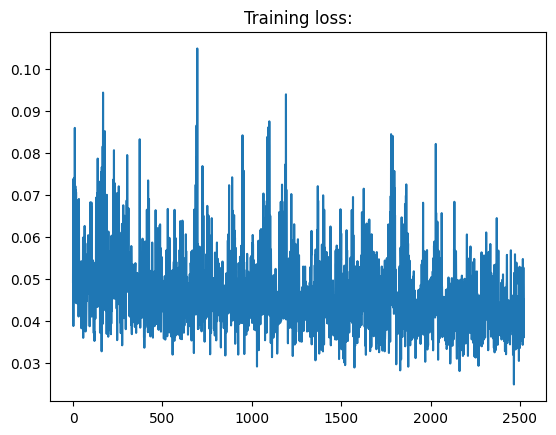

In [21]:
np.random.seed(1)

parameters, velocity = init_parameters(
    num_inputs = X_train.shape[0],
    num_hidden_1 = num_hidden_1,
    num_hidden_2 = num_hidden_2,
    num_outputs = num_outputs,
)

a1 = 'relu'
a2 = 'tanh'

trained_parameters = training_model(
    parameters,
    velocity,
    batch_size = 128,
    epoch = 30,
    learning_rate = 0.1,
    beta = 0.9,
    a1=a1,
    a2=a2
)

### <span style="color:blue">3.2 Evaluate the performance of your model (<span style="color:green">0.5 points</span>)<span>

Implement the forward propagation step for testing the model performance in the code cell below.

In [22]:
def testing_model(X, parameters):
    # TODO: implement the forward propagation for testing step (0.5 points)
    # Hint: call forward_propagation() function and get the output A3
    outputs = forward_propagation(X, parameters, a1, a2)
    A3 = outputs[-1]
    print("Test MSE: {}".format(MSELoss(Y_test, A3)))

Let's test the accuracy of our model.

In [23]:
testing_model(X_test, trained_parameters)

Test MSE: 0.0427213546694355


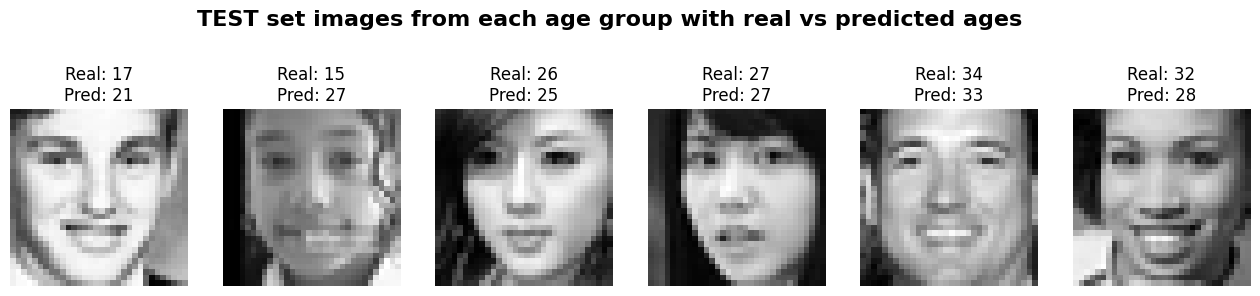

In [24]:
# --- TEST FIGURE ---
fig_test, axes_test = plt.subplots(1, 6, figsize=(16, 8))
fig_test.suptitle(
    "TEST set images from each age group with real vs predicted ages",
    y=0.73, fontsize=16, fontweight='bold'
)

plot_idx = 0
np.random.seed(0)
for (low, high) in age_groups:
    # Find indices of images in this age group
    indices = np.where((Y_test >= low) & (Y_test < high))[0]
    if len(indices) < 2:
        continue  # skip if not enough images

    chosen = np.random.choice(indices, size=2, replace=False)
    for i in chosen:
        # Forward propagation to predict age
        outputs = forward_propagation(X_test[:, i], trained_parameters, a1, a2)
        A3 = outputs[-1]  # predicted normalized age

        # Reshape image
        img = X_test[:, i].reshape(HEIGHT, WIDTH)

        # Convert normalized prediction back to actual age
        real_age = int(Y_test_r[i])
        pred_age = int(A3[0] * (40 - 10) + 10)

        axes_test[plot_idx].imshow(img, cmap="gray")
        axes_test[plot_idx].set_title(f"Real: {real_age}\nPred: {pred_age}")
        axes_test[plot_idx].axis("off")
        plot_idx += 1

plt.show()

## <span style="color:blue">Part 4: Activation function tuning (<span style="color:green">0.5 points</span>)<span>

### <span style="color:blue">4.1 Using different activation functions to check their effectiveness  (<span style="color:green">0.5 points</span>)<span>

Start training the model:
Number of training samples: 11139
Number of batchs: 87
=> Epoch 0, elapsed time: 2.94 seconds
loss: 0.054079509798208025
=> Epoch 1, elapsed time: 2.05 seconds
loss: 0.04900797689410689
=> Epoch 2, elapsed time: 1.59 seconds
loss: 0.04760251370810785
=> Epoch 3, elapsed time: 1.69 seconds
loss: 0.04675377923360574
=> Epoch 4, elapsed time: 1.64 seconds
loss: 0.045810107196517645
=> Epoch 5, elapsed time: 1.58 seconds
loss: 0.04631266461262779
=> Epoch 6, elapsed time: 2.31 seconds
loss: 0.04478073510504974
=> Epoch 7, elapsed time: 1.86 seconds
loss: 0.044657742023918305
=> Epoch 8, elapsed time: 1.59 seconds
loss: 0.0446752361344411
=> Epoch 9, elapsed time: 1.61 seconds
loss: 0.04454826484961185
=> Epoch 10, elapsed time: 1.60 seconds
loss: 0.04368308823703056
=> Epoch 11, elapsed time: 1.64 seconds
loss: 0.04337929485521561
=> Epoch 12, elapsed time: 1.64 seconds
loss: 0.04350279164789167
=> Epoch 13, elapsed time: 2.55 seconds
loss: 0.043132736785822336
=>

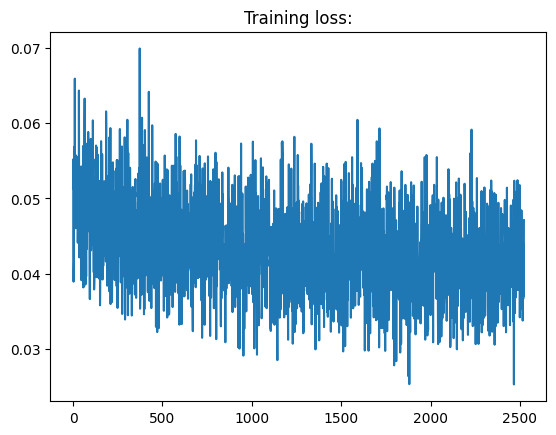

In [29]:
np.random.seed(1)

parameters, velocity = init_parameters(
    num_inputs = X_train.shape[0],
    num_hidden_1 = num_hidden_1,
    num_hidden_2 = num_hidden_2,
    num_outputs = num_outputs,
)

# TODO: try different activation functions you defined earlier (0.5 points)
a1 = 'tanh'
a2 = 'sigmoid'
###a1='relu' and a2='tanh' gives the best answer but i chose to use different functions like a1= 'tanh' and a2='sigmoid'
trained_parameters = training_model(
    parameters,
    velocity,
    batch_size = 128,
    epoch = 30,
    learning_rate = 0.05,
    beta = 0.9,
    a1=a1,
    a2=a2
)

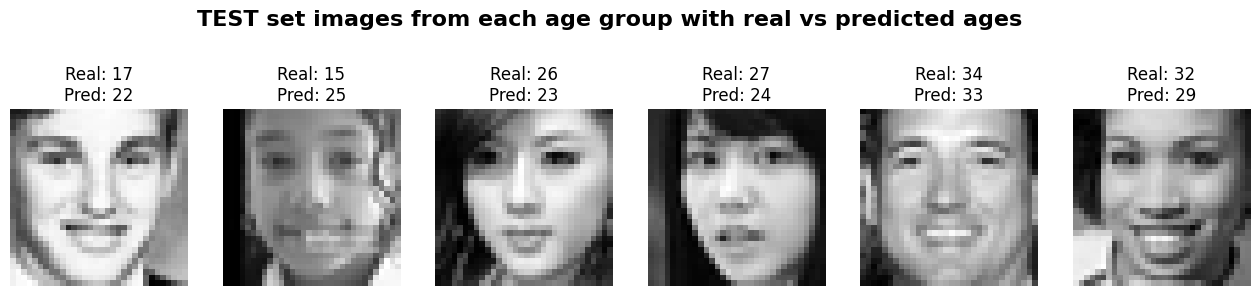

In [30]:
# --- TEST FIGURE ---
fig_test, axes_test = plt.subplots(1, 6, figsize=(16, 8))
fig_test.suptitle(
    "TEST set images from each age group with real vs predicted ages",
    y=0.73, fontsize=16, fontweight='bold'
)

plot_idx = 0
np.random.seed(0)
for (low, high) in age_groups:
    # Find indices of images in this age group
    indices = np.where((Y_test >= low) & (Y_test < high))[0]
    if len(indices) < 2:
        continue  # skip if not enough images

    chosen = np.random.choice(indices, size=2, replace=False)
    for i in chosen:
        # Forward propagation to predict age
        outputs = forward_propagation(X_test[:, i], trained_parameters, a1, a2)
        A3 = outputs[-1]  # predicted normalized age

        # Reshape image
        img = X_test[:, i].reshape(HEIGHT, WIDTH)

        # Convert normalized prediction back to actual age
        real_age = int(Y_test_r[i])
        pred_age = int(A3[0] * (40 - 10) + 10)

        axes_test[plot_idx].imshow(img, cmap="gray")
        axes_test[plot_idx].set_title(f"Real: {real_age}\nPred: {pred_age}")
        axes_test[plot_idx].axis("off")
        plot_idx += 1

plt.show()